<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [21]:
# Paquetes necesarios
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [8]:


url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"
df = pd.read_csv(url)      # ← aquí se realiza la lectura de los datos

display(df.head())           # ← aquí se muestran las primeras filas del conjunto de datos
print(df.info())           # ← info extra de columnas y tipos (opcional)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [10]:
# Columnas numéricas de características (sin id ni price)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
feature_cols = [c for c in num_cols if c not in ['id', 'price']]
X_feat = df[feature_cols]

scalers = {
    "zscore_standard": StandardScaler(),
    "minmax_0_1": MinMaxScaler(),
    "robust": RobustScaler()
}

for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X_feat)
    df_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

    print(f"\nResumen para: {name}")
    display(df_scaled.describe().T[['mean', 'std', 'min', 'max']].round(2))

best_scaler_name = "robust"
print(f"\nEscalador seleccionado como mejor ajuste: {best_scaler_name}")


Resumen para: zscore_standard


,mean,std,min,max
bedrooms,0.0,1.0,-3.62,31.86
bathrooms,-0.0,1.0,-2.75,7.64
sqft_living,0.0,1.0,-1.95,12.48
sqft_lot,0.0,1.0,-0.35,39.50
floors,-0.0,1.0,-0.92,3.71
waterfront,-0.0,1.0,-0.09,11.47
view,-0.0,1.0,-0.31,4.91
condition,-0.0,1.0,-3.70,2.44
grade,0.0,1.0,-5.66,4.55
sqft_above,0.0,1.0,-1.81,9.20



Resumen para: minmax_0_1


,mean,std,min,max
bedrooms,0.10,0.03,0.0,1.0
bathrooms,0.26,0.10,0.0,1.0
sqft_living,0.14,0.07,0.0,1.0
sqft_lot,0.01,0.03,0.0,1.0
floors,0.20,0.22,0.0,1.0
waterfront,0.01,0.09,0.0,1.0
view,0.06,0.19,0.0,1.0
condition,0.60,0.16,0.0,1.0
grade,0.55,0.10,0.0,1.0
sqft_above,0.16,0.09,0.0,1.0



Resumen para: robust


,mean,std,min,max
bedrooms,0.37,0.93,-3.00,30.00
bathrooms,-0.18,1.03,-3.00,7.67
sqft_living,0.15,0.82,-1.44,10.36
sqft_lot,1.33,7.33,-1.26,291.03
floors,-0.01,0.54,-0.50,2.00
waterfront,0.01,0.09,0.00,1.00
view,0.23,0.77,0.00,4.00
condition,0.41,0.65,-2.00,2.00
grade,0.66,1.18,-6.00,6.00
sqft_above,0.22,0.81,-1.25,7.70



Escalador seleccionado como mejor ajuste: robust


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [11]:
# Separar características (X) y etiqueta (y) y mostrar sus dimensiones

# Etiqueta
y = df['price']

# Características numéricas (mismas que en el escalado, sin id ni price)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
feature_cols = [c for c in num_cols if c not in ['id', 'price']]
X = df[feature_cols]

print("Columnas de características:", feature_cols)
print("Dimensión de X (características):", X.shape)
print("Dimensión de y (etiqueta):", y.shape)


Columnas de características: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Dimensión de X (características): (21613, 18)
Dimensión de y (etiqueta): (21613,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [13]:
# Usar el último dígito de tu cédula
random_state_cedula = 2  # ← cambia este 2 por tu último número

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=random_state_cedula
)

print("Dimensión de X_train:", X_train.shape)
print("Dimensión de X_test: ", X_test.shape)
print("Dimensión de y_train:", y_train.shape)
print("Dimensión de y_test: ", y_test.shape)

Dimensión de X_train: (17290, 18)
Dimensión de X_test:  (4323, 18)
Dimensión de y_train: (17290,)
Dimensión de y_test:  (4323,)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

Distribución de las etiquetas (train vs test):


,train,test
count,1.729000e+04,4.323000e+03
mean,5.393636e+05,5.429860e+05
std,3.654765e+05,3.736850e+05
min,7.500000e+04,8.100000e+04
25%,3.201500e+05,3.250000e+05
50%,4.500000e+05,4.500000e+05
75%,6.450000e+05,6.400000e+05
max,7.700000e+06,5.570000e+06


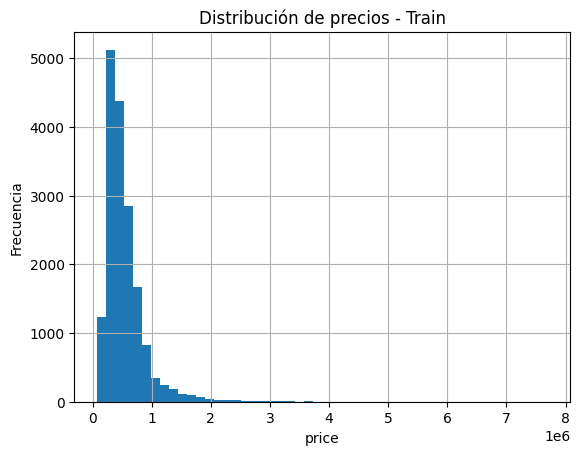

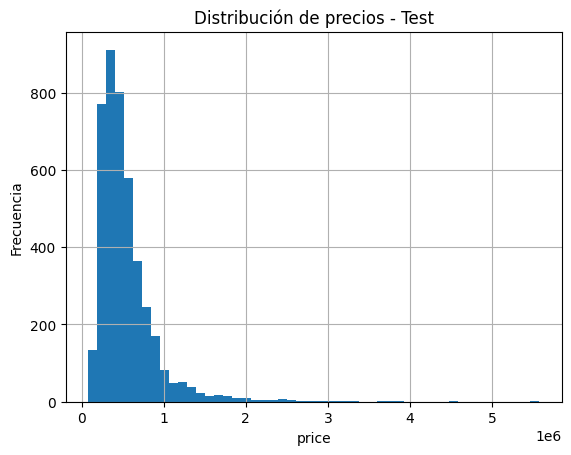

In [15]:
# Resumen estadístico de y_train y y_test
stats_train = y_train.describe().to_frame('train')
stats_test  = y_test.describe().to_frame('test')
stats = pd.concat([stats_train, stats_test], axis=1)

print("Distribución de las etiquetas (train vs test):")
display(stats)

# Histogramas de la distribución de precios
plt.figure()
y_train.hist(bins=50)
plt.title("Distribución de precios - Train")
plt.xlabel("price")
plt.ylabel("Frecuencia")

plt.figure()
y_test.hist(bins=50)
plt.title("Distribución de precios - Test")
plt.xlabel("price")
plt.ylabel("Frecuencia")

plt.show()

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

In [18]:
# Definir el modelo de regresión lineal
modelo_lr = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_lr.fit(X_train, y_train)

print("Modelo entrenado correctamente.")
print("Intercepto:", modelo_lr.intercept_)
print("Número de coeficientes:", len(modelo_lr.coef_))

Modelo entrenado correctamente.
Intercepto: 7726248.151885966
Número de coeficientes: 18


---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [19]:
# Predicciones sobre el conjunto de prueba
y_pred = modelo_lr.predict(X_test)

# Tabla con valores reales vs predichos
resultados = pd.DataFrame({
    'price_real': y_test.values,
    'price_predicho': y_pred
})

display(resultados.head(10))  # puedes cambiar 10 por más filas si quieres

,price_real,price_predicho
0,735000.0,7.143133e+05
1,1150000.0,1.422462e+06
2,350500.0,4.198066e+05
3,860000.0,1.288337e+06
4,122000.0,-3.394489e+04
5,725000.0,7.014292e+05
6,417000.0,6.646565e+05
7,594950.0,5.393075e+05
8,471000.0,4.150376e+05
9,634950.0,8.408241e+05


Calcula el error cuadrático medio.

In [22]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)







Error cuadrático medio (MSE): 39702436672.08322


Escribe el error cuadrático medio para cada tipo de escalado:

- Escalado MaxAbsScaler:
- Escalado MinMaxScaler:
- Escalado RobustScaler:
- Escalado StandardScaler:
- Escalado Normalizer:
- Escalado QuantileTransformer:
- Escalado PowerTransformer:

In [25]:
from sklearn.preprocessing import (
    MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler,
    Normalizer, QuantileTransformer
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display
import pandas as pd

scalers = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=0)
    # "PowerTransformer": PowerTransformer(method='yeo-johnson')  # ← LO QUITAMOS DEL LOOP
}

mse_results = {}

for name, scaler in scalers.items():
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred_scaled)
    mse_results[name] = mse

df_mse = pd.DataFrame.from_dict(mse_results, orient='index', columns=['MSE'])
display(df_mse.sort_values('MSE'))

print("\nErrores cuadráticos medios por tipo de escalado:")
for name, mse in mse_results.items():
    print(f"Escalado {name}: {mse:.2f}")


,MSE
MaxAbsScaler,3.970244e+10
MinMaxScaler,3.970244e+10
StandardScaler,3.970244e+10
RobustScaler,3.970244e+10
Normalizer,3.978533e+10
QuantileTransformer,5.131509e+10



Errores cuadráticos medios por tipo de escalado:
Escalado MaxAbsScaler: 39702436672.09
Escalado MinMaxScaler: 39702436672.09
Escalado RobustScaler: 39702436672.09
Escalado StandardScaler: 39702436672.09
Escalado Normalizer: 39785332158.41
Escalado QuantileTransformer: 51315094901.65


Escribe un párrafo sobre qué hace cada escalado no visto en clase:


Escalado PowerTransformer:
PowerTransformer aplica una transformación de potencia (como Yeo-Johnson) para reducir la asimetría y estabilizar la varianza de las variables, intentando que su distribución se parezca más a una normal. Es útil cuando las variables son muy positivas y sesgadas (por ejemplo, ingresos o precios). En este conjunto de datos en particular, el ajuste de PowerTransformer dio problemas numéricos, por lo que no se pudo usar para calcular el MSE, pero teóricamente es una opción avanzada para tratar variables muy sesgadas.